<a href="https://colab.research.google.com/github/MrStark1029/Water_Monitoring_ML/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 5.jpg to 5.jpg


In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/5.jpg"  # Update with actual path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#plt.imshow(image_rgb)
#plt.axis("off")
#plt.show()


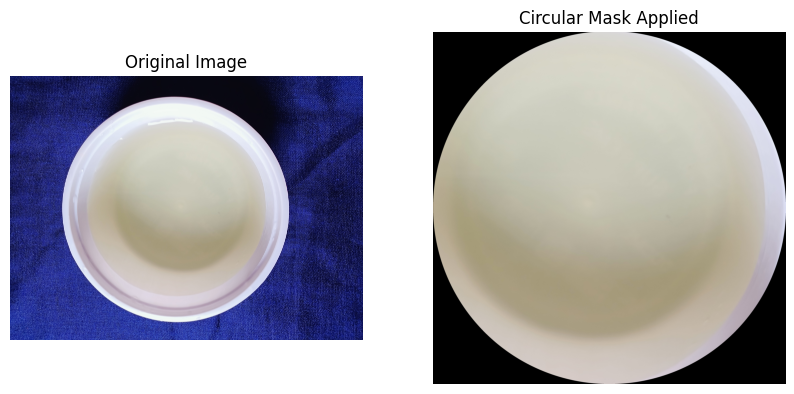

In [ ]:
import numpy as np

# Step 1: Define Circle Parameters (Adjust Manually or Use Detection)
h, w = image.shape[:2]
center_x, center_y = w // 1.95, h // 1.985  # Assume cup is centered
center_x, center_y = int(center_x), int(center_y)
radius = min(w, h) // 2.5  # Adjust this value if needed
radius = int(0.8*radius)
# Step 2: Create a Black Mask
mask = np.zeros((h, w), dtype=np.uint8)

# Step 3: Draw a White Circle on the Mask
cv2.circle(mask, (center_x, center_y), radius, (255, 255, 255), thickness=-1)

# Step 4: Apply the Mask
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
#cv2.circle(masked_image, (center_x, center_y), int(0.8*radius), (255, 0, 0), thickness=8)
# Step 5: Crop to the Circular Region
x1, y1, x2, y2 = center_x - radius, center_y - radius, center_x + radius, center_y + radius
cropped_cup = masked_image[max(y1, 0):min(y2, h), max(x1, 0):min(x2, w)]

# Show Results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Original Image")

# Masked Circular Image
plt.subplot(1, 2, 2)
plt.imshow(cropped_cup)
plt.axis("off")
plt.title("Circular Mask Applied")

plt.show()

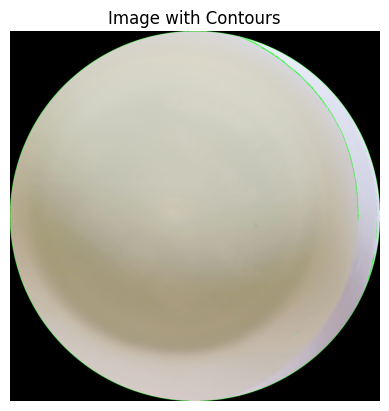

In [ ]:
gray = cv2.cvtColor(cropped_cup, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 10)
edges = cv2.Canny(blurred, 10,10)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

image_with_contours = cv2.drawContours(cropped_cup.copy(), contours, -1, (0, 255, 0), 2)

plt.imshow(image_with_contours)
plt.axis("off")
plt.title("Image with Contours")
plt.show()
